# Importing Libraries

In [1]:
import numpy as np # Version '1.26.4'
import pandas as pd # Version '2.2.2'
import matplotlib # Version '3.9.0'
from matplotlib import pyplot as plt 
import seaborn as sns # Version '0.13.2'

import modules.functions as fnc

print('Numpy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', matplotlib.__version__)
print('Seaborn', sns.__version__)

Numpy 1.26.4
Pandas 2.2.2
Matplotlib 3.9.0
Seaborn 0.13.2


# Loading Dataset

In [2]:
df = pd.read_csv('../data/Customer_Behaviour.csv')
df[:5]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df.groupby(['Gender', 'Purchased'])[['Purchased']].count()

Purchased
Gender Purchased           
Female 0                127
       1                 77
Male   0                130
       1                 66

In [6]:
df.groupby('Gender')['EstimatedSalary'].mean()

Gender
Female    71759.803922
Male      67642.857143
Name: EstimatedSalary, dtype: float64

In [7]:
pd.crosstab(df['Purchased'], df['Gender'], normalize='columns')

Gender,Female,Male
Purchased,,
0,0.622549,0.663265
1,0.377451,0.336735


In [8]:
table = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='EstimatedSalary', aggfunc=['min', 'max', 'median', 'mean'])
table.columns.names = [None, None]
table.index.names = [None]
table

min            max           median                   mean              
  Female   Male  Female    Male   Female     Male        Female          Male
0  15000  15000  134000  141000  62000.0  60500.0  61480.314961  59630.769231
1  20000  20000  150000  150000  96000.0  87500.0  88714.285714  83424.242424

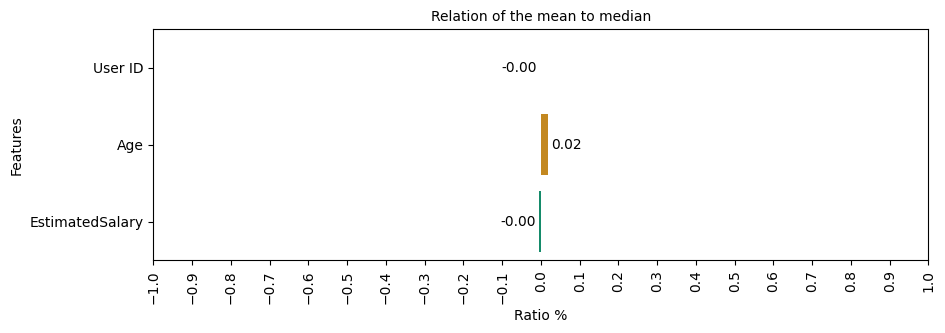

In [9]:
fnc.mean_to_median(df,(10,3),"../figures/Relation of the mean to median.png")

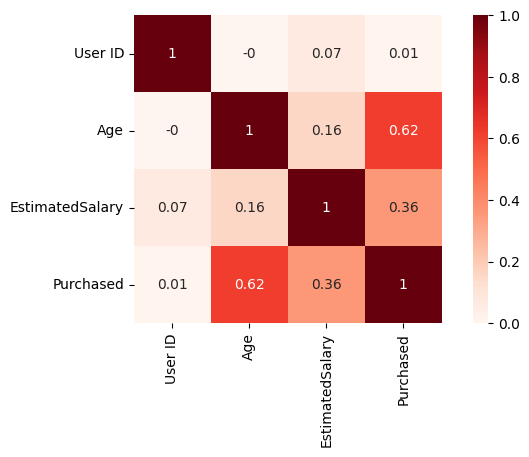

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(numeric_only=True).round(2), annot=True, cmap='Reds', square=True)
plt.savefig('../figures/Heatmap of correlations.png')
plt.show()

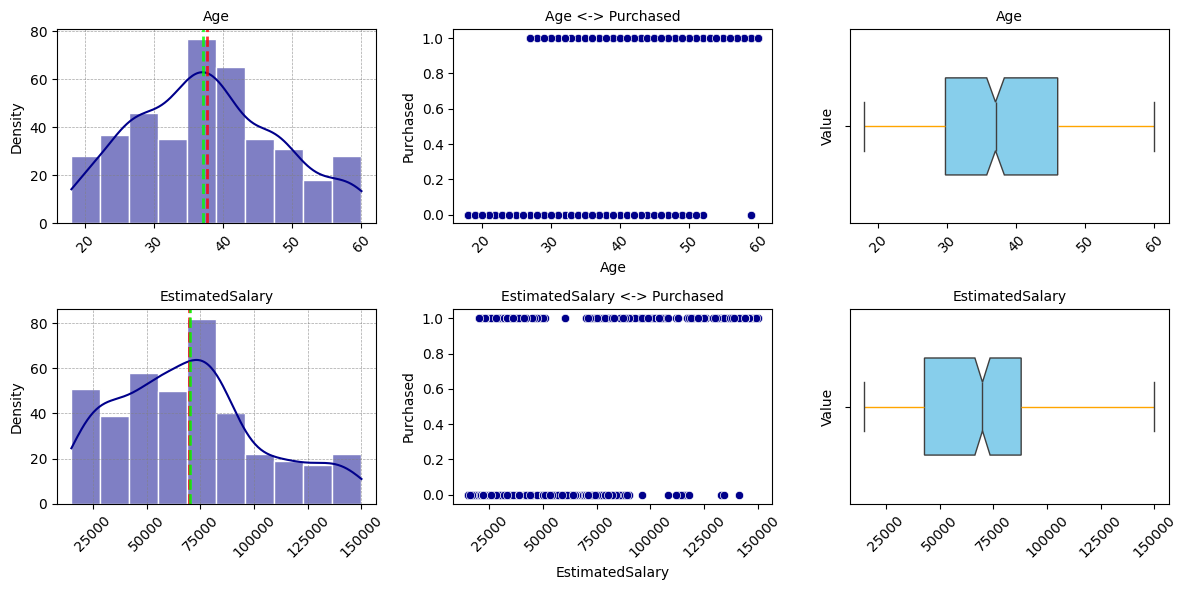

In [11]:
fnc.feature_plot(data=df, features=['Age', 'EstimatedSalary'], pair='Purchased', figsize=(12,6), bins=10, path='../figures/Feature descriptive visuals.png')

# Data Export

In [12]:
df.to_csv('../data/data_clean.csv', index=False)